# LABORATORIO 1 - Práctica 2: Preparación y visualización de Datos
---
<img src="ufv.png" width="100px" height="100px"></img> 
### Integrantes: 
* Julián Prieto Velasco   
* Guillermo Ramírez Cárdenas
* Pedro Paniagua Falo     
* Javier Muñoz Rojas

---

## **Índice**
1. [Introducción](#id0)
1. [Ejercicio 1](#id1)
1. [Ejercicio 2](#id2)
1. [Ejercicio 3](#id3)

<div id='id0'/>

## *Introducción*

---
En el siguiente estudio se abordará el análisis de datos de los clientes de la sucursal del Banco Santander situada en el campus de la Universidad Francisco de Vitoria. Para ello, se utilizará un dataset proporcionado por la propia sucursal.

El objetivo principal de este estudio es explorar los datos de los clientes y obtener información valiosa que pueda ser útil para la sucursal y para la toma de decisiones. Se realizarán diferentes análisis y se crearán visualizaciones para obtener una mejor comprensión de los datos.
El análisis de datos, también conocido como data mining, es una técnica que permite extraer información y patrones útiles de grandes cantidades de datos. En este caso, se aplicará data mining para explorar los datos de los clientes y obtener información valiosa que pueda ser útil para la sucursal.

En esta memoria, se presentarán los resultados del análisis y se discutirán las implicaciones de estos resultados para la sucursal y para la toma de decisiones. En resumen, se espera que este estudio proporcione una comprensión más profunda de los datos de los clientes y permita a la sucursal tomar decisiones informadas sobre su negocio.


### *Librerías*

In [11]:
#importación de librerias
import csv
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D


<div id='id1'>

## *Ejercicio 1*

---
Para llegar a la solución solicitada se ha usado la biblioteca pandas y se ha hecho de la función read_csv() esta nos almacena en un dataset todo el CSV. Para poder leer correctamente el CSV se ha utilizado el atributo sep de la función, ya que la separación de elementos es de “;” y no de “,”.
Una vez almacenados todos los datos en el dataframe, se ha procedido a comprobar que no haya datos duplicados, anómalos y nulos. En este caso no se ha encontrado ningún dato de este tipo.

* Leer CSV

In [12]:
#leemos el CSV, usamos el atributo sep para decirle a la función cómo está separado los datos del CSV
Banco_DataSet = pd.read_csv('banco ufv.csv', sep=';')
#dataset
Banco_DataSet.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


* Limpieza de datos: para comprobar que no hay datos duplicados o nulos se ha hecho uso de las funciones isduplicated() e isnull() respectivamente. El dataframe por lo tanto queda de la siguiente manera:

In [13]:
#Comprobación de datos anómalos o redundantes
Banco_DataSet_Corregido = Banco_DataSet
#sumatorio de datos duplicados
print("Numero de datos duplicados: ", Banco_DataSet_Corregido.duplicated().sum())
#Sumatorio de datos anómalos
print("\n|Datos Null|\nTipo de dato                        Numero de datos nulos")
print(Banco_DataSet_Corregido.isnull().sum())
Banco_DataSet_Corregido = Banco_DataSet_Corregido[Banco_DataSet_Corregido.contact != "unknown"] 

Numero de datos duplicados:  0

|Datos Null|
Tipo de dato                        Numero de datos nulos
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


Para un buen estudio de los datos debemos eliminar del Dataset todos los datos que son anómalos o no están completos.

En el enunciado se ha pedido que se genere un nuevo dataframe con unos datos en específico para poder realizar el estudio. Para ello se ha hecho uso de la librería pandas y la función DataFrame() 
-  Nuevo DataFrame con los datos solicitados

In [14]:
#agrupar datos solicitados
Banco_DataSet_Corregido = pd.DataFrame({'age': Banco_DataSet_Corregido['age'],
                        'education': Banco_DataSet_Corregido['education'],
                        'balance': Banco_DataSet_Corregido['balance'],
                        'duration': Banco_DataSet_Corregido['duration']
                        })
Banco_DataSet_Corregido.head()

,age,education,balance,duration
12657,27,secondary,35,255
12658,54,primary,466,297
12659,43,secondary,105,668
12660,31,secondary,19,65
12661,27,secondary,126,436


Debemos generar un DataFrame a partir de los datos del DataFrame leído en el CSV especificado con los datos solicitados en el enunciado

### Escritura en el CSV

El nuevo Datset debe ser escrito en un CSV, en nuestro caso lo hemos denominado datosBanco.csv

In [15]:
#guardar en el csv
Banco_DataSet_Corregido.to_csv("datosBanco.csv", index = False)

## ¿Está el nivel de estudios está directamente relacionado con el saldo de cada cliente en la cuenta?

Para contestar a la pregunta de si está relacionado el saldo que una persona tiene en la cuenta del banco con sus estudios en un principio se decidió realizar un diagrama de dispersión. 

Pero al tener una variable cualitativa, nivel de educación, y otra cuantitativa, saldo en el banco, no se podía estudiar correctamente la correlación entre estas dos variables. Por lo tanto, se decidió realizar un pieChart para cada rango.

Se han dividido los datos en tres rangos: 
* De 0 a 10.000€ de saldo 
* Mayor de 10.000€ de saldo y con deudas
* Menor de 0€ de saldo. 

Una vez divididos se han generado 3 dataframes uno para cada rango de la siguiente manera:

In [16]:
#hacemos una funcion para clasificar cada cliente
def rango(saldo):
    if saldo < 0:
        return 3
    elif saldo >= 0 and saldo <= 10000:
        return 1
    elif saldo > 10000:
        return 2
#creamos una nueva columna en el dataset para clasificar los clientes
Banco_DataSet_Corregido['Rango'] = Banco_DataSet_Corregido['balance'].apply(rango)

#creamos DataSets por rango
Rango1 = Banco_DataSet_Corregido.loc[Banco_DataSet_Corregido["Rango"] == 1]
Rango2 = Banco_DataSet_Corregido.loc[Banco_DataSet_Corregido["Rango"] == 2]
Rango3 = Banco_DataSet_Corregido.loc[Banco_DataSet_Corregido["Rango"] == 3]

### PieChart para 0 - 10000 €

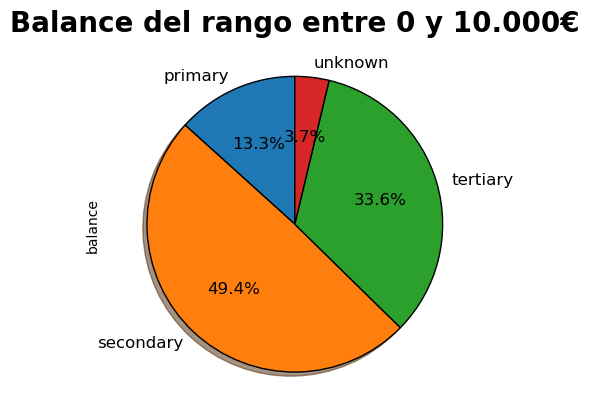

In [17]:
# Agrupamos los clientes por nivel de educación y calculamos el promedio de saldo para cada grupo
education_grouped = Rango1.groupby('education').count()

# Seleccionamos la columna de balance
balance_by_education = education_grouped['balance']

# Dibujamos el pie chart
balance_by_education.plot.pie(autopct='%1.1f%%', startangle=90,wedgeprops={'edgecolor':'black'}, textprops={'fontsize': 12}, shadow=True)

# Agregamos un título al gráfico
plt.title('Balance del rango entre 0 y 10.000€', fontsize=20, fontweight='bold', color='black')

# Mostramos el gráfico
plt.show()


**Entre 0-10.000€:** 
*  49.4% => Secundaria  
*  13.3% => Primaria
*  33.6% => Terciaria
*  3.7% => Desconocidos

### PieChart a partir 10000€

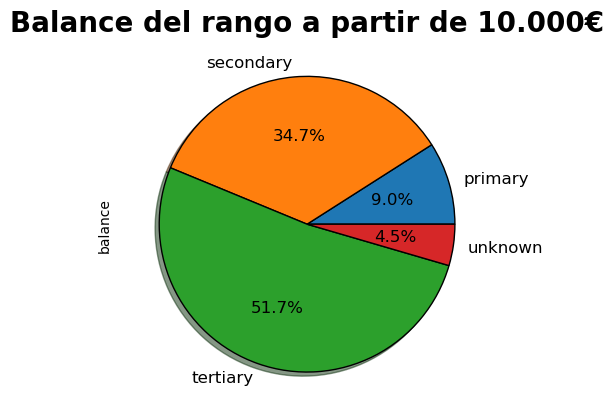

In [18]:
# Agrupamos los clientes por nivel de educación y calculamos el promedio de saldo para cada grupo
education_grouped = Rango2.groupby('education').count()

# Seleccionamos la columna de balance
balance_by_education = education_grouped['balance']

# Dibujamos el pie chart
balance_by_education.plot.pie(autopct='%1.1f%%', startangle=0,wedgeprops={'edgecolor':'black'}, textprops={'fontsize': 12}, shadow=True)

# Agregamos un título al gráfico
plt.title('Balance del rango a partir de 10.000€', fontsize=20, fontweight='bold', color='black')

# Mostramos el gráfico
plt.show()

**A partir de 10.000€:** 
*  34.7% => Secundaria  
*  9.0% => Primaria
*  51.7% => Terciaria
*  4.5% => Desconocidos

### PieChart para saldos negativos

C:\Users\julia\AppData\Local\Temp\ipykernel_7508\1812078072.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Rango3_abs['balance'] = Rango3_abs['balance'].abs()


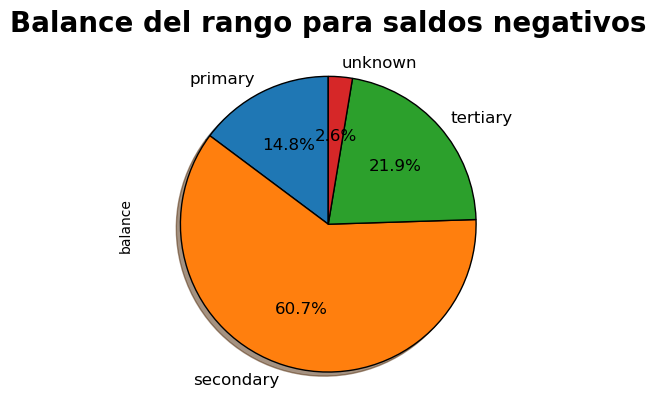

In [19]:
# Agrupamos los clientes por nivel de educación y calculamos el promedio de saldo para cada grupo

Rango3_abs = Rango3
Rango3_abs['balance'] = Rango3_abs['balance'].abs()

education_grouped = Rango3.groupby('education').count()

# Seleccionamos la columna de balance
balance_by_education = education_grouped['balance']

# Dibujamos el pie chart
balance_by_education.plot.pie(autopct='%1.1f%%', startangle= 90,wedgeprops={'edgecolor':'black'}, textprops={'fontsize': 12}, shadow=True)
# Agregamos un título al gráfico
plt.title('Balance del rango para saldos negativos', fontsize=20, fontweight='bold', color='black')

# Mostramos el gráfico
plt.show()

**Con deudas** 
*  60.0% => Secundaria  
*  14.8% => Primaria
*  21.9% => Terciaria
*  2.6% => Desconocidos

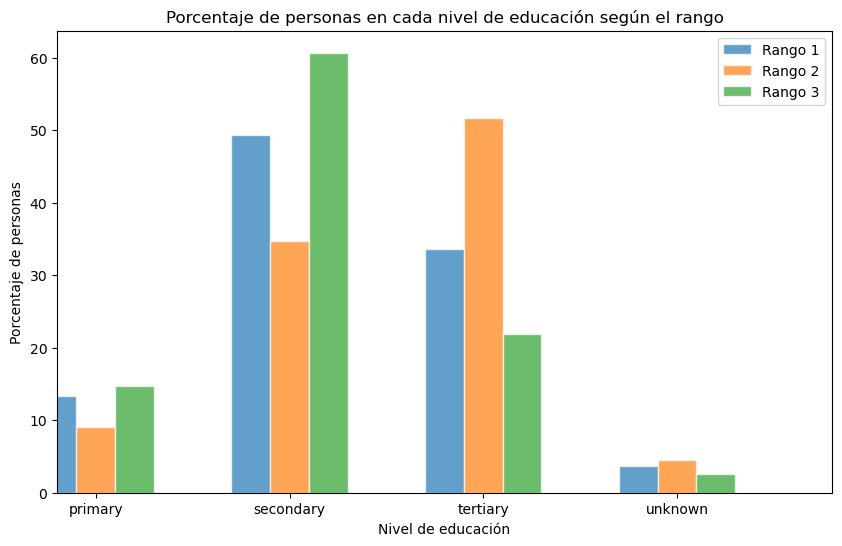

In [34]:
# Obtener el número de personas en cada nivel de educación por cada rango
educacion_rango1 = Rango1.groupby('education')['education'].count()
educacion_rango2 = Rango2.groupby('education')['education'].count()
educacion_rango3 = Rango3.groupby('education')['education'].count()

# Calcular los porcentajes de personas en cada nivel de educación por cada rango
total_rango1 = educacion_rango1.sum()
total_rango2 = educacion_rango2.sum()
total_rango3 = educacion_rango3.sum()

porcentaje_rango1 = educacion_rango1 / total_rango1 * 100
porcentaje_rango2 = educacion_rango2 / total_rango2 * 100
porcentaje_rango3 = educacion_rango3 / total_rango3 * 100

# Configurar las posiciones de las barras
posiciones = np.arange(len(porcentaje_rango1))
ancho = 0.2

# Crear el gráfico de barras para el rango 1
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(posiciones - ancho, porcentaje_rango1.values, width=ancho, label='Rango 1', alpha=0.7, edgecolor='white')

# Crear el gráfico de barras para el rango 2
ax.bar(posiciones, porcentaje_rango2.values, width=ancho, label='Rango 2', alpha=0.7, edgecolor='white')

# Crear el gráfico de barras para el rango 3
ax.bar(posiciones + ancho, porcentaje_rango3.values, width=ancho, label='Rango 3', alpha=0.7, edgecolor='white')

# Configurar el gráfico
ax.set_xticks(posiciones)
ax.set_xticklabels(porcentaje_rango1.index)
ax.set_xlabel('Nivel de educación')
ax.set_ylabel('Porcentaje de personas')
ax.set_title('Porcentaje de personas en cada nivel de educación según el rango')
ax.legend()

# Ajustar la posición de las barras
ax.set_xlim([-ancho, len(posiciones) - ancho])

# Mostrar el gráfico
plt.show()



### Conclusión Ejercicio 1:

Como podemos observar en los distintos PieCharts obtenemos los siguientes resultados: 

**Con deudas**                                          
*  60.0% => Secundaria    
*  14.8% => Primaria                        
*  21.9% => Terciaria                     
*  2.6% => Desconocidos 
--------------------------               
**A partir de 10.000€:** 
*  34.7% => Secundaria  
*  9.0% => Primaria
*  51.7% => Terciaria
*  4.5% => Desconocidos
--------------------------
**Entre 0-10.000€:** 
*  49.4% => Secundaria  
*  13.3% => Primaria
*  33.6% => Terciaria
*  3.7% => Desconocidos

Por lo tanto, podemos afirmar que los usuarios que tienen deudas son más proclives a finalizar sus estudios en la educación secundaria y muy pocos de ellos se desconoce su educación. En cambio, que están entre 0 y 10.000€ de saldo en la cuenta podemos afirmar que se posicionan la mayoría en la educación secundaria y un tercio de ellos en la terciaria. Por último, los que tienen más de 10.000€ de saldo se acumulan en la educación terciaria con 51.7% de ellos, además son el grupo del que más se desconoce su educación pero el que menos usuarios se quedan en educación primaria. 

Con estos datos, podríamos concluir que el saldo de la cuenta y el nivel de educación está directamente relacionado pero gracias al diagrama de barras podemos concluir que no, no está directamente relacionado. Se presenta una gran cantidad de clientes en todos los niveles de educación del rango entre 0 y 10.000€ y el que menos tiene es el rango más de 10.000€ siendo inferior al de los de los endeudados.

Por lo tanto, no están relacionados el saldo de las cuentas y el nivel de educación de los clientes.

<div id='id2'>

## *Ejercicio 2*

---
En este análisis, se quiere conocer la distribución de los clientes en diferentes grupos de edad. Esto puede ser importante para entender si la cuenta creada a través de la Universidad es utilizada principalmente por jóvenes o no. Por lo tanto, se realiza una transformación en los datos, donde se considera a los clientes menores de 30 años como estudiantes, de 30 a 45 años como trabajadores jóvenes y de 46 a 65 años como trabajadores veteranos. 

Finalmente, se representará esta distribución a través de un gráfico, lo que permitirá interpretar los resultados y tomar decisiones en consecuencia.

### Clasificación de Clientes por edad
Para la clasificación de los clientes se ha seguido el siguiente procedimiento: 

In [ ]:
#hacemos una funcion para clasificar cada cliente
def clasificar_cliente(edad):
    if edad < 30:
        return 'Alumno'
    elif edad >= 30 and edad <= 45:
        return 'Profesor'
    elif edad > 45 and edad <= 65:
        return 'Trabajador Veterano'
    else:
        return 'No Vinculado a la Universidad'
#creamos una nueva columna en el dataset para clasificar los clientes
Banco_DataSet_Corregido['Clasificacion'] = Banco_DataSet_Corregido['age'].apply(clasificar_cliente)

Una vez clasificados se muestra el número de clientes según la clasificación: 

In [ ]:

Banco_DataSet_Corregido['Clasificacion'].value_counts()

Profesor                         17986
Trabajador Veterano               9703
Alumno                            3751
No Vinculado a la Universidad      751
Name: Clasificacion, dtype: int64

### Gráfico de Barras de los tipos de clientes
Para un mejor estudio de la distribución de la edad y el tipo de cliente se ha realizado un gráfico de barras en el que se muestra el número de clientes según su edad.

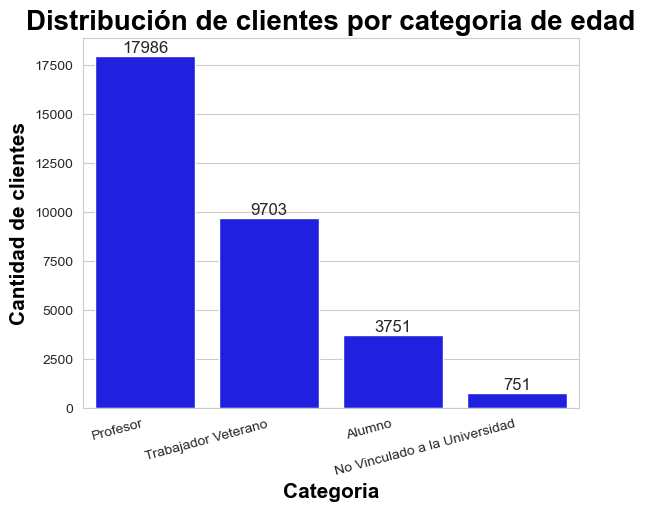

In [ ]:
# Categorias
categorias = Banco_DataSet_Corregido['Clasificacion'].value_counts()

# Dibuja el gráfico de barras
sns.set_style("whitegrid")
barplot = sns.barplot(x=categorias.index, y=categorias.values, color="blue")

# Configura la etiqueta x
plt.xlabel('Categoria', fontweight='bold', color='black', fontsize=15)

# Configura la etiqueta y
plt.ylabel('Cantidad de clientes', fontweight='bold', color='black', fontsize=15)
plt.xticks(rotation= 15, ha="right")

# Añade el número total en cada barra
for i in barplot.containers:
    barplot.bar_label(i, fontsize=12)

# Configura el título
plt.title('Distribución de clientes por categoria de edad', fontsize=20, fontweight='bold', color='black')

# Muestra el gráfico
plt.show()


### Conclusión ejercicio 2

El grupo que más clientes tiene es el de Profesores, seguido de Trabajador veterano, después alumno y por último no vinculado a la universida. Estos datos tienen mucho sentido pues los alumnos generalmente no tienen nóminas ni necesidad de tener una cuenta de banco. Además, el número de años que pasa un profesor en la universidad generalmente es mayor al de un alumno, lo mismo con los trabajadores veteranos. Por último, el grupo más pequeño, el no vinculadoa a la universidad se puede deber a personas que vivan cerca de la universidad y sea el banco más cercano a su domicilio.

<div id='id3'/>

## *Ejercicio 3*

---
La duración en la empresa es un factor importante a la hora de analizar la relación de un cliente con una empresa. Por lo tanto, es importante tener una buena comprensión de cómo se distribuyen las frecuencias de los clientes en términos de años en la empresa. Para hacer esto, primero es necesario transformar los datos de días a años, lo que nos dará una idea de cuánto tiempo ha estado cada cliente en la empresa.

Luego, buscaremos la representación más útil de estos datos, ya sea a través de un gráfico de barras, un histograma o cualquier otro tipo de representación que nos permita visualizar la información de manera clara y concisa. A partir de esta representación, podremos sacar conclusiones acerca de la distribución de clientes en términos de años en la empresa y cómo esto puede influir en la estrategia de la empresa en el futuro.


### Grafico de líneas de como se distribuyen los días que el cliente lleva en la empresa

Para poder analizar correctamente la frecuencia con la que va una persona al banco en relación con los años se ha decidido usar el siguiente gráfico de líneas:

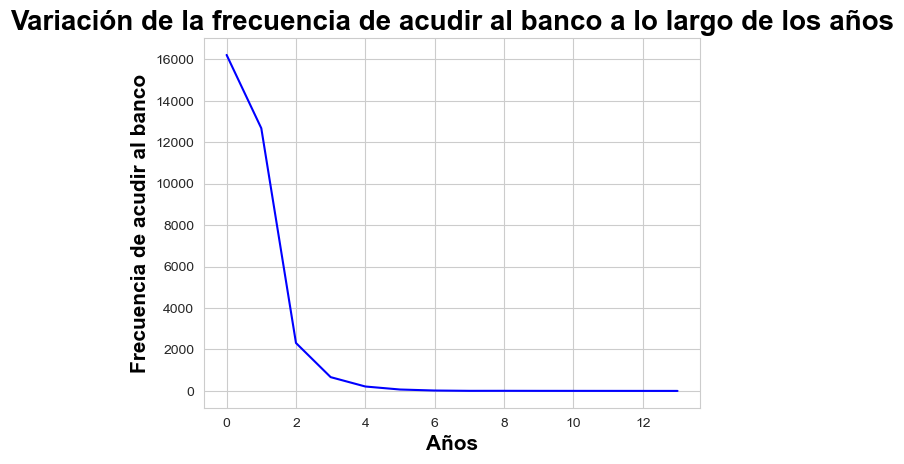

In [ ]:
#transformación de años a días
Banco_DataSet_Corregido['duration'] = Banco_DataSet_Corregido['duration'] / 365
#agruapción de los años redondeados y cuenta la cantidad de clientes en cada grupo.
Banco_DataSet_Duracion = Banco_DataSet_Corregido.groupby(Banco_DataSet_Corregido['duration'].round().astype(int)).count()
#Dibuja el gráfico de lineas
plt.plot(Banco_DataSet_Duracion.index, Banco_DataSet_Duracion['age'], color='blue')
#Configura las etiquetas y tiutulos
plt.xlabel('Años', fontweight='bold', color='black', fontsize=15)
plt.ylabel('Frecuencia de acudir al banco', fontweight='bold', color='black', fontsize=15)
plt.title('Variación de la frecuencia de acudir al banco a lo largo de los años', fontsize=20, fontweight='bold', color='black')
#muestra el diagrama
plt.show()

### Conclusión ejercicio 3:

En el gráfico podemos observar cómo en el primer año hay una frecuencia muy alta de clientes yendo a la empresa, en cambio a lo largo de los años se va reduciendo al mínimo. 

Los datos nos dicen que la mayoría de los clientes llevan menos de 5 años en la empresa, con una distribución relativamente simétrica. También podemos ver que hay algunos clientes que llevan mucho más tiempo en la empresa, pero son menos frecuentes. Esta información puede ser útil para la empresa para identificar patrones en la retención de clientes y para desarrollar estrategias para fidelizar a sus clientes.

Se ha decidido usar un histograma para representar la distribución de los datos porque es una forma efectiva de mostrar la frecuencia de las observaciones dentro de diferentes rangos de valores. Un histograma es especialmente útil cuando se quiere ver la forma de una distribución y la frecuencia de las observaciones dentro de diferentes intervalos.

Además, un histograma es un gráfico fácil de leer y entender, que permite a los usuarios ver la forma de la distribución de los datos y identificar patrones y tendencias en los datos de una manera visual. Por estas razones, se decidió usar un histograma para representar la distribución de los datos en este caso.
